Text(0, 0.5, 'Pulse Amplitude: Correlates to E')

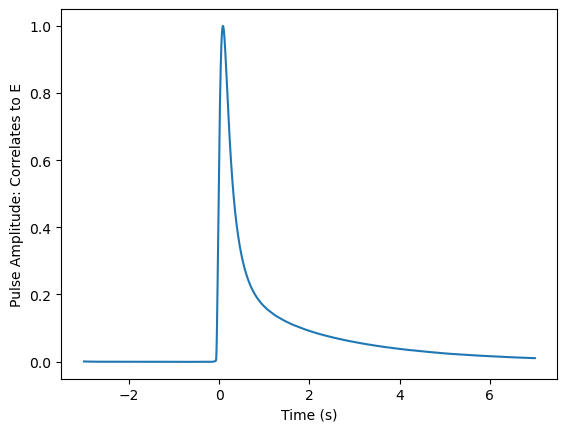

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot as up
tower2p1_events=pd.read_csv("pulse_out/Tower2p1_event_info.csv") #contains reconstruction information
pulses_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['samples'] #pulses
event_nums_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['event_number'] #event numbers to connect pulses to reconstruction info

ADC2mV=8.0108642578125e-02 ##this number should be checked with up-to-date front end board readings, but is fine for now
tower2p1_events
tower2p1_events["Channel"].unique()
CHANNEL=60 #hard-coding this for now...
file=open("average_pulse_dump/Channel00"+str(CHANNEL)+"_AveragePulse.txt")
for line in file:
    parse=line.replace("fData  ","")
    parse=parse.replace("\n","")
    splits=parse.split(" ")
    avg_pulse=np.array(splits,dtype=float)
    break

cleaned_avg_pulse=(avg_pulse-np.mean(avg_pulse[0:50]))/np.max(avg_pulse-np.mean(avg_pulse[0:50]))
#check out what normalized average pulse for channel 60 is

fully_sampled_times=np.linspace(-3,7,10000) #seconds

plt.plot(fully_sampled_times,cleaned_avg_pulse)

plt.xlabel("Time (s)")
plt.ylabel("Pulse Amplitude: Correlates to E")                                      

1123.4049474985482  keV


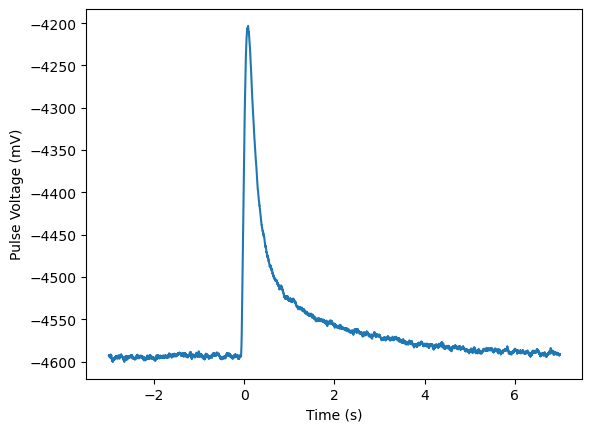

In [2]:
THIS_PULSE=8272 #pulse we'll focus on, to get nODE working
#check info on it...

#how to pass back & forth between event number & pulse id...
tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]]
THIS_ENERGY=tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]].iloc[0]['Energy']
plt.plot(np.linspace(-3,7,10000),ADC2mV*pulses_tower2p1[THIS_PULSE])

plt.xlabel("Time (s)")
plt.ylabel("Pulse Voltage (mV)")

print(THIS_ENERGY, " keV")

In [3]:
ch60_pulses=pulses_tower2p1[tower2p1_events['Channel']==60]
ch60_events=tower2p1_events[tower2p1_events['Channel']==60]

pick_pulse=31 # which pulse you want on the channel, between 0 & len(ch60_pulses)-1. I'm randomly choosing 32 here
this_pulse=ch60_pulses[pick_pulse] #voltage values for the pulse timestream
pulse_info=ch60_events.iloc[pick_pulse] #info for that pulse. need to access through iloc to correspond to same order as the pulse timestream\

pulse1, pulse2, pulse3 = ch60_pulses[29], ch60_pulses[30], ch60_pulses[31]

In [4]:
pulse1 = pulse1 + np.min(pulse1)*-1
pulse2 = pulse2+ np.min(pulse2)*-1
pulse3 = pulse3 + np.min(pulse3)*-1

pulse1 = pulse1/10000
pulse2 = pulse2/10000
pulse3 = pulse3/10000

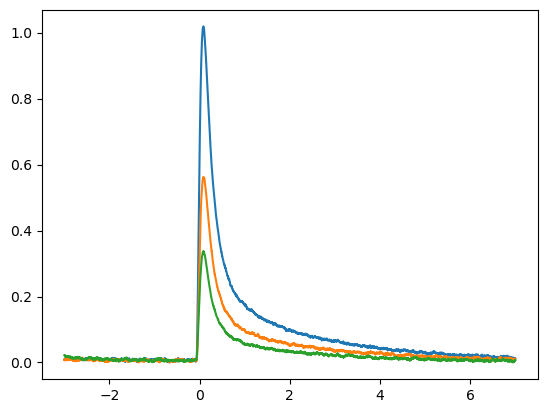

In [5]:
plt.plot(np.linspace(-3,7,10000),pulse1)
plt.plot(np.linspace(-3,7,10000),pulse2)
plt.plot(np.linspace(-3,7,10000),pulse3)

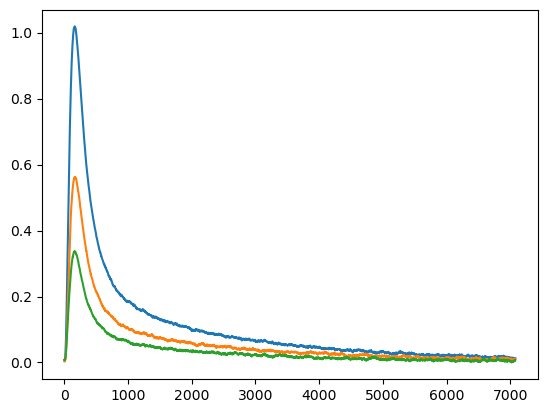

In [6]:
energies = [pulse1, pulse2, pulse3]
times = [np.linspace(-3,7,10000), np.linspace(-3,7,10000), np.linspace(-3,7,10000)]

plt.plot(energies[0][2920:])
plt.plot(energies[1][2920:])
plt.plot(energies[2][2920:])

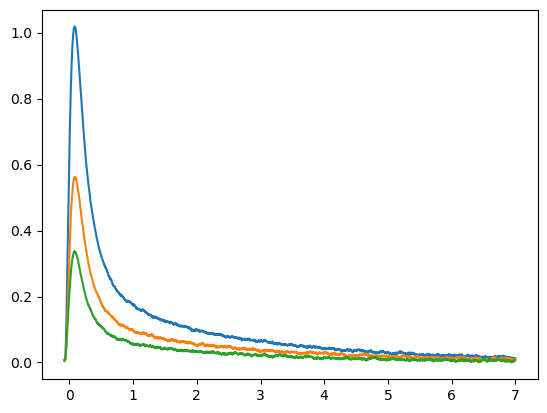

In [7]:
energies[0] = energies[0][2920:]
times[0] =  times[0][2920:]

energies[1] = energies[1][2920:]
times[1] =  times[1][2920:]

energies[2] = energies[2][2920:]
times[2] =  times[2][2920:]

plt.plot(times[0],energies[0])
plt.plot(times[1],energies[1])
plt.plot(times[2],energies[2])

In [8]:
import numpy as np 
import pandas as pd 

import optax
import matplotlib.pyplot as plt
from typing import List
import equinox as eqx
import jax
import jax.numpy as jnp
import time

import diffrax
import equinox as eqx  # https://github.com/patrick-kidger/equinox
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax

energies[0] = jnp.array(energies[0])/np.max(energies[0])
times[0] = jnp.array(times[0])

energies[1] = jnp.array(energies[1])/np.max(energies[0])
times[1] = jnp.array(times[1])

energies[2] = jnp.array(energies[2])/np.max(energies[0])
times[2] = jnp.array(times[2])

data = [(energies[0], times[0]), (energies[1], times[1]), (energies[2], times[2])]

In [9]:
length = len(energies[0])

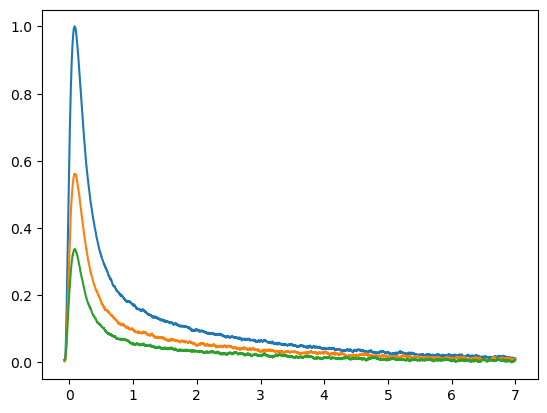

In [10]:
plt.plot(data[0][1], data[0][0])
plt.plot(data[1][1], data[1][0])
plt.plot(data[2][1], data[2][0])

In [11]:
vars = 10*jnp.array([[0, max( data[0][0]), 0], [0, max( data[1][0]), 0], [0, max( data[2][0]), 0]])
vars

Array([[ 0.   , 10.   ,  0.   ],
       [ 0.   ,  5.614,  0.   ],
       [ 0.   ,  3.368,  0.   ]], dtype=float32)

In [24]:
import math
def model_to_loss(model, ys1, ys2, ys3, t_s):
    # Solve the differential equation
    
    #print(type(t_s[0]))
    #print("MODELTOLOSS", y_s[0], z_s[0], t_s[len[t_s]])
    solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(model),
        diffrax.Tsit5(),
        t0=t_s[0],
        t1=t_s[-1],
        dt0=0.001,
        y0=vars,   
        stepsize_controller=diffrax.PIDController(rtol=1e-5, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(t_s)),
    )
    
    y_1_all = solutions.ys[:len(solutions.ys), 0]
    y_2_all =  solutions.ys[:len(solutions.ys), 1]
    y_3_all =  solutions.ys[:len(solutions.ys), 2]
     


    y_1 = y_1_all[:, 0]
    y_2  = y_2_all[:, 0]
    y_3  = y_3_all[:, 0]



   
   
    y_diff_1 = jnp.mean((y_1 - ys1[:length]) ** 2)
    y_diff_2 = jnp.mean((y_2 - ys2[:length]) ** 2)
    y_diff_3 = jnp.mean((y_3 - ys3[:length]) ** 2)




    all_outputs = solutions.ys

    

   
    zero_input = jnp.zeros_like(all_outputs[-1])
    zero_output = model(0, zero_input)  
    equilibrium_loss = jnp.mean(jnp.abs(zero_output) ** 2)

    #print(np.sum(max_energy - solutions.ys[:length-1, 3]).item)
    #l2_loss = reg_lambda * sum(jnp.sum(jnp.square(p)) for p in jax.tree_util.tree_leaves(model) if p.ndim > 0)
    total_loss = (y_diff_1 + y_diff_2 + y_diff_3 + equilibrium_loss)
    return total_loss

class LinearFunction(eqx.Module):
    layers: list

    def __init__(self, key): 
        key1, key2, key3, key4, key5, key6, key7 = jax.random.split(key, 7)
        self.layers = [eqx.nn.Linear(9,8, key = key1, use_bias=True), 
                       eqx.nn.Linear(8,9, key = key2, use_bias=True)] 
    def __call__(self, t, y, *args):
        y = jnp.ravel(y)
        for layer in self.layers[:-1]:
            y = jax.nn.tanh(layer(y))
        y = self.layers[-1](y)
        y = y.reshape(3,3)
        return y

In [25]:
z_s = z_s = np.linspace(0, 4, length)
model_to_loss_and_grad = eqx.filter_value_and_grad(model_to_loss)
opt = optax.rmsprop(learning_rate=0.003)
key = jax.random.PRNGKey(41)
key, subkey = jax.random.split(key, 2)



def make_step(m, opt_s, ys1, ys2, ys3, t_s):
    loss, grad = model_to_loss_and_grad(eqx.filter(m, eqx.is_inexact_array), ys1, ys2, ys3, t_s)

    updates, opt_s = opt.update(grad, opt_s, m)
    m = eqx.apply_updates(m, updates)
    return m, opt_s, loss

loss_history = []
MODEL = LinearFunction(subkey)
best_loss = float('inf')
opt_state = opt.init(eqx.filter(MODEL, eqx.is_array))

#print(MODEL, opt_state, energies[0], energies[1], energies[2])
for epoch in range(10000):
    MODEL, opt_state, loss = make_step(MODEL, opt_state, energies[0], energies[1], energies[2], times[0])
    loss_history.append(loss)
     # Log every 100 epochs
    print(f"Epoch {epoch}, Loss {loss}")

Epoch 0, Loss 13.255687713623047
Epoch 1, Loss 8.196344375610352
Epoch 2, Loss 5.914896011352539
Epoch 3, Loss 4.331478118896484
Epoch 4, Loss 3.155808687210083
Epoch 5, Loss 2.254279613494873
Epoch 6, Loss 1.5542271137237549
Epoch 7, Loss 1.0156917572021484
Epoch 8, Loss 0.6286534667015076
Epoch 9, Loss 0.40468108654022217
Epoch 10, Loss 0.29511258006095886
Epoch 11, Loss 0.23565326631069183
Epoch 12, Loss 0.2000531405210495
Epoch 13, Loss 0.17740295827388763
Epoch 14, Loss 0.16233184933662415
Epoch 15, Loss 0.15220634639263153
Epoch 16, Loss 0.14558394253253937
Epoch 17, Loss 0.14481869339942932
Epoch 18, Loss 0.16429001092910767
Epoch 19, Loss 0.22734828293323517
Epoch 20, Loss 0.1914512813091278
Epoch 21, Loss 0.19688259065151215
Epoch 22, Loss 0.13691212236881256
Epoch 23, Loss 0.12986178696155548
Epoch 24, Loss 0.12305845320224762
Epoch 25, Loss 0.12061545997858047
Epoch 26, Loss 0.11832430958747864
Epoch 27, Loss 0.11697123944759369
Epoch 28, Loss 0.11563093960285187
Epoch 29, L

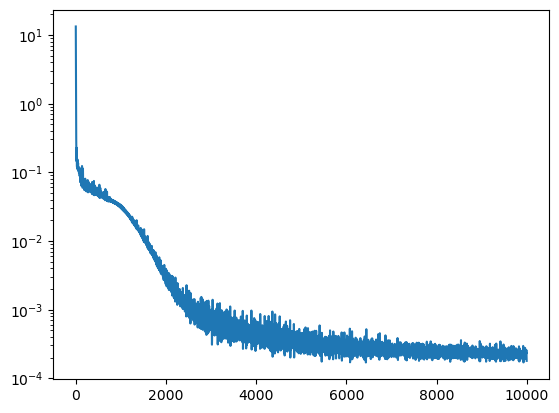

In [28]:
plt.plot(loss_history)
plt.yscale('log')

In [31]:
solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(MODEL),
        diffrax.Tsit5(),
        t0=times[0][0],
        t1=times[0][-1],
        dt0=0.001,
        y0=vars,   
        stepsize_controller=diffrax.PIDController(rtol=1e-5, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(times[0])),
    )

Text(0.5, 1.0, 'Neural ODE Model of Data')

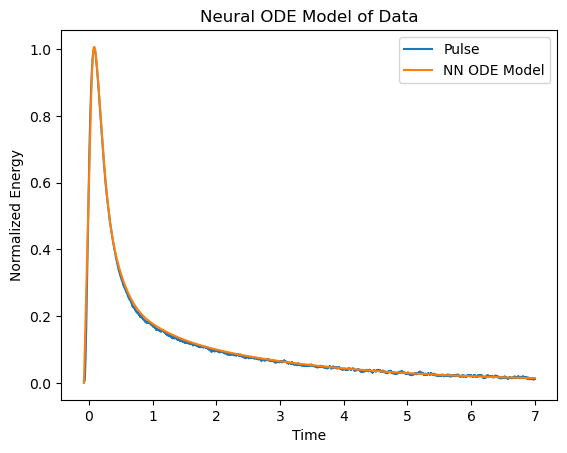

In [42]:
y1_pred = solutions.ys[:len(solutions.ys), 0][:, 0]
plt.plot(times[0], energies[0], label = "Pulse")
plt.plot(times[0], y1_pred, label = "NN ODE Model")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normalized Energy")
plt.title("Neural ODE Model of Data")

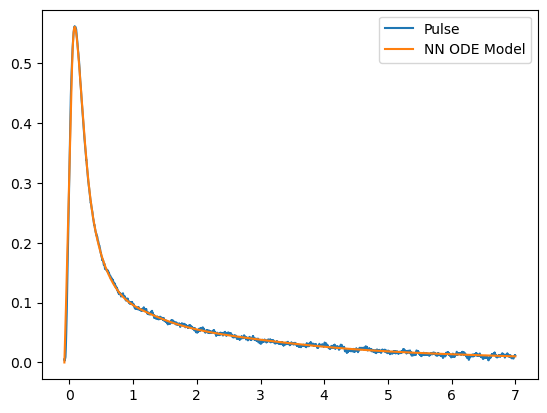

In [40]:
y2_pred = solutions.ys[:len(solutions.ys), 1][:, 0]
plt.plot(times[0], energies[1], label = "Pulse")
plt.plot(times[0], y2_pred, label = "NN ODE Model")
plt.legend()

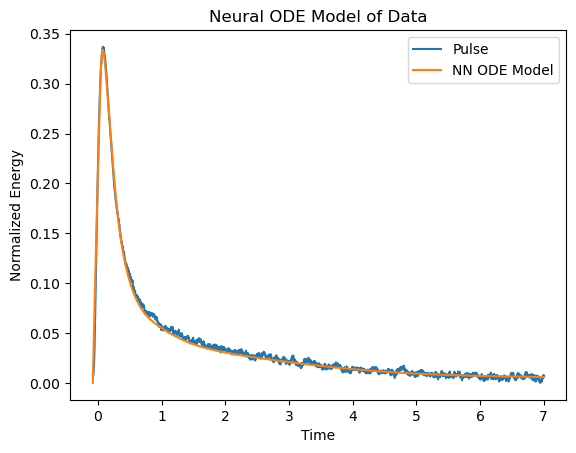

In [43]:
y3_pred = solutions.ys[:len(solutions.ys), 2][:, 0]
plt.plot(times[0], energies[2], label = "Pulse")
plt.plot(times[0], y3_pred, label = "NN ODE Model")
plt.xlabel("Time")
plt.ylabel("Normalized Energy")
plt.title("Neural ODE Model of Data")
plt.legend()